In [2]:
using NamedTrajectories
using QuantumCollocation

In [3]:
data_path = "data/binomial_code/T_200_dt_10.0_Q_200.0_R_L1_1.0_max_iter_2000_dda_bound_0.0001_00000.jld2"
data = load_problem(data_path; return_data=true)

Loading data dict from data/binomial_code/T_200_dt_10.0_Q_200.0_R_L1_1.0_max_iter_2000_dda_bound_0.0001_00000.jld2:



Dict{String, Any} with 5 entries:
  "options"     => Options{Float64}(1.0e-8, 100.0, 2000, 1.0e6, 1.0, 1.0e-12, 0…
  "integrators" => AbstractIntegrator[QuantumStatePadeIntegrator{Float64}(nothi…
  "params"      => Dict{Symbol, Any}(:eval_hessian=>true, :objective_terms=>Dic…
  "system"      => QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0…
  "trajectory"  => NamedTrajectory{Float64}([1.0 1.0 … 0.764841 0.768357; 0.0 1…

In [8]:
traj = data["trajectory"]
system = data["system"]

QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … -1.0518999959890363 0.0; 0.0 0.0 … 0.0 -1.064367544664884], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 3.605551275463989; 0.0 0.0 … 3.605551275463989 0.0], [0.0 0.0 … 0.0 0.0; -0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … -0.0 0.0]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 1.0 … 0.0 0.0; -1.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 3.605551275463989; 0.0 0.0 … -3.605551275463989 0.0]], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 

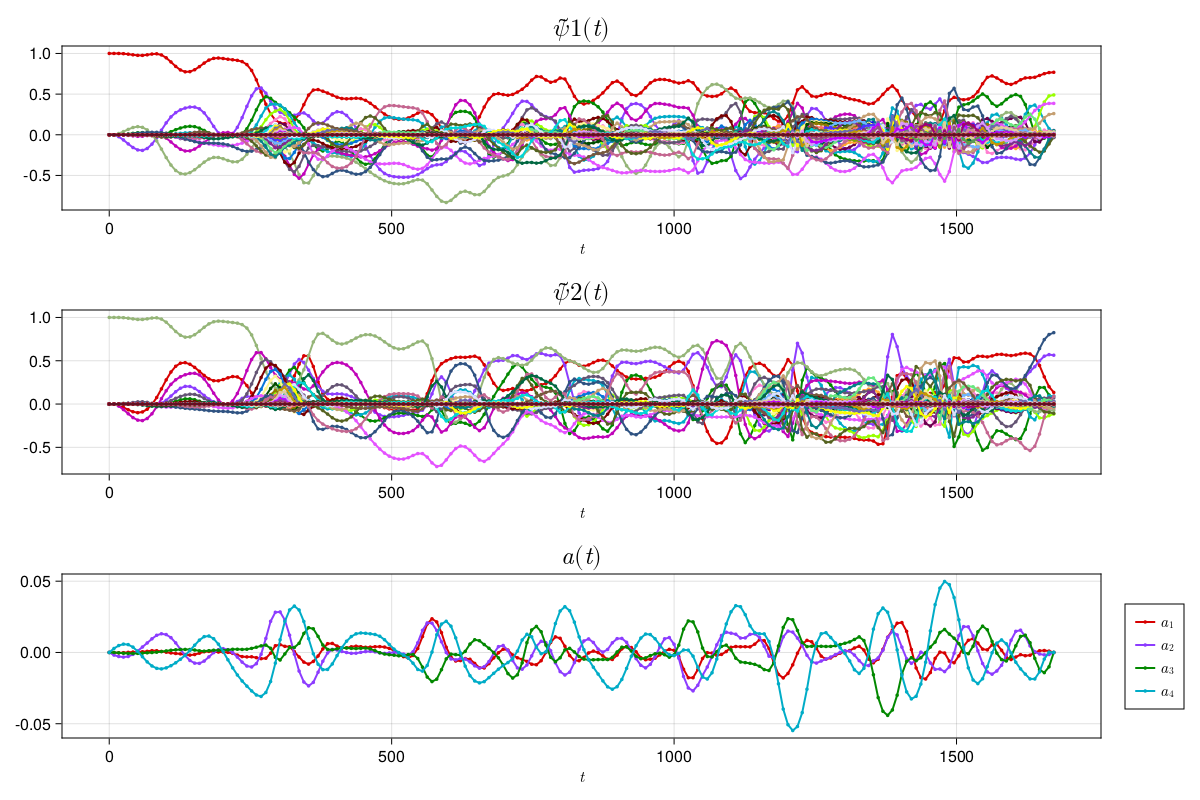

In [6]:
plot(traj, [:ψ̃1, :ψ̃2, :a]; ignored_labels=[:ψ̃1, :ψ̃2])

In [9]:
ψ̃¹_final = rollout(traj.initial.ψ̃1, traj.a, traj.Δt, system; integrator=exp)[:, end]

ψ̃²_final = rollout(traj.initial.ψ̃2, traj.a, traj.Δt, system; integrator=exp)[:, end]

final_fidelity_1 = fidelity(ψ̃¹_final, traj.goal.ψ̃1)
final_fidelity_2 = fidelity(ψ̃²_final, traj.goal.ψ̃2)

println("Final fidelity 1: $final_fidelity_1")
println("Final fidelity 2: $final_fidelity_2")

Final fidelity 1: 0.8831317424404179
Final fidelity 2: 0.9283534312155872


In [10]:
transmon_levels = 3
cavity_levels = 14
cavity_forbidden_states = cavity_levels .* [1, 2, 3, 4]
transmon_forbidden_states = (2 * (transmon_levels - 1) * cavity_levels + 1) : (2 * transmon_levels * cavity_levels)

57:84

In [11]:
cavity_forbidden_states, transmon_forbidden_states

([14, 28, 42, 56], 57:84)

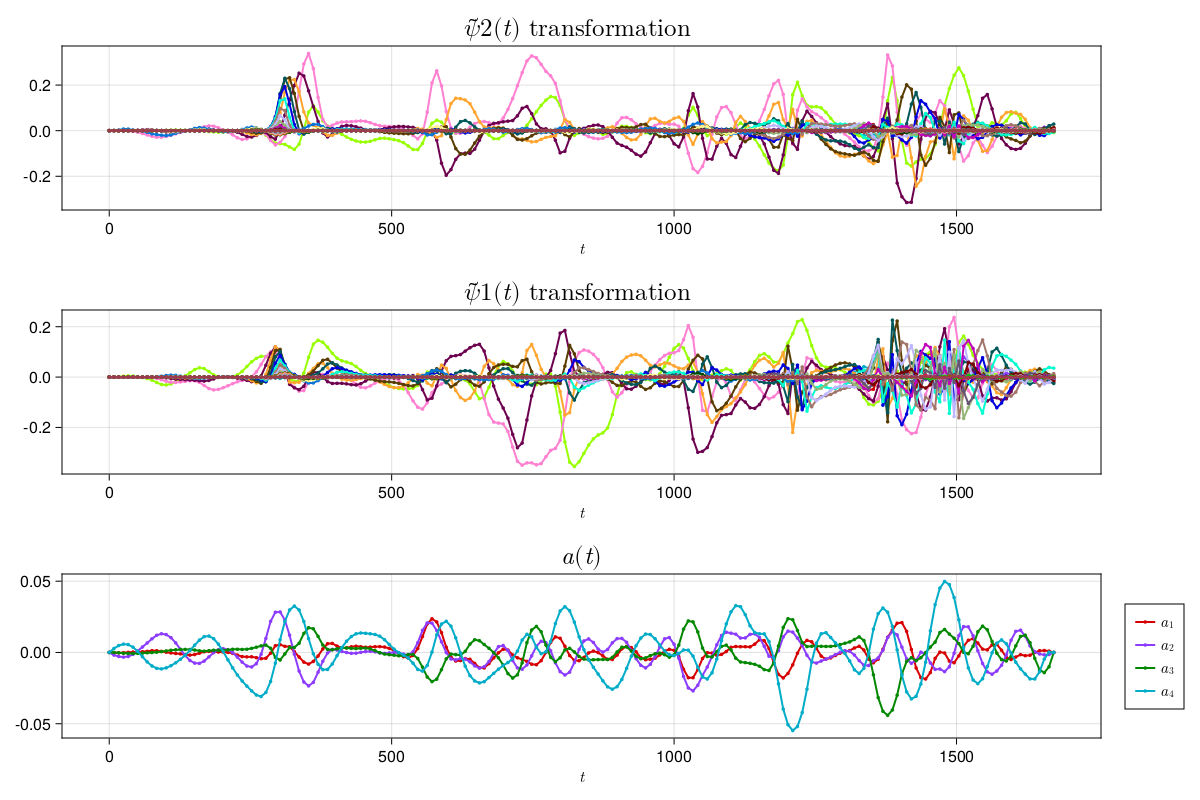

In [13]:
maps = Dict(
    :ψ̃1 => ψ̃ -> ψ̃[[cavity_forbidden_states; transmon_forbidden_states]],
    :ψ̃2 => ψ̃ -> ψ̃[[cavity_forbidden_states; transmon_forbidden_states]],
)
plot(traj, [:a];transformations=maps)

In [14]:
traj.components.ψ̃1

1:84

In [15]:
84 ÷ 3 * 2

56